In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
'''
Problem 12)
Grab a big 2d array, and assume it represents a function `f(x,y)`
Create functions that compute, for each `(x,y)` in the domain of `f`:
(1) The partial derivatives with respect to `x`, `y`
(2) The four second-order partial derivatives
(3) The gradient vector
(4) The Hessian
'''


# Setting up a bunch of arrays to play around with

A = plt.imread("Sponge.jpg")
#R,G,B,P are all 'big' 2d arrays
R,G,B,P = A[:,:,0],A[:,:,1],A[:,:,2],A[:,:,3]

def f(x,y):
    return x**2 + y**3 +2*x*y

F = np.fromfunction(f,(10,10))


In [6]:
'''
In the case of image processing derivates cannot be calculated from functions, as RGB are not functions.
Instead, compare neighboring indecies to get the rate of change at each location. What needs to be done, as far as I know,
is average the change from the left and right side. If I were building a function for this, say I only needed partials of x,
I would most likely use np.diff, which automatically subtracts neighboring values.

In this case, I wasn't sure if you wanted the (probably most efficient) built in numpy solution, or if you
wanted me to write the method for conceptual understanding. I could do either I believe, so just let me know.
'''
grad= np.gradient(R)

In [7]:
'''
The partial derivative w.r.t. x should be =2x, all indecies except for the first and last of each row
match this exactly.
'''
grad[0]

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [8]:
'''
Similarly, the derivative w.r.t. y should be =3y^2, and these values match exactly in all but the first and last
positions. The  reason why the first and last positions are wrong is due to the fact that the rate of change is not
averaged with any values lower/higher than it.

The values of y are very close to what I expected.
'''
grad[1]

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [9]:
'''
To get the second order partials, I will just input the first order partials into np.gradient

For the second partials w.r.t.  x:

sec_part_x = [d/dx^2, d/dxdy]


For the second partials w.r.t. y:

sec_part_y = [d/dydx, d/dy^2]


To access any of the 4 partials, simply index the array at [0,1] as shown above

'''
sec_part_x,sec_part_y = np.gradient(grad[0]),np.gradient(grad[1])

In [10]:
sec_part_x,sec_part_y

([array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ..., 
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]]),
  array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ..., 
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]])],
 [array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ..., 
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]]),
  array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...

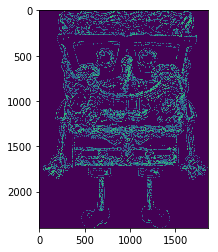

In [11]:
'''
This  makes building the hessian vector extremely simple, unless I'm totally misunderstanding what you want.
'''
hess = sec_part_x[0]*sec_part_y[1] - sec_part_x[1]*sec_part_y[0]
plt.imshow(grad[1] + grad[0])

In [12]:
'''
Problem 13) too
'''

'\nProblem 13) too\n'

In [13]:
def get_radial_array(radius):
    # Credit where it is due
    # https://stackoverflow.com/questions/8647024/how-to-apply-a-disc-shaped-mask-to-a-numpy-array
    radial = np.zeros((2*radius+1,2*radius+1))
    y,x = np.ogrid[-radius:radius+1, -radius:radius+1]
    print(np.ogrid[-radius:radius+1, -radius:radius+1])
    mask = x**2 + y**2 <= radius**2
    radial[mask] = 1
    return radial

In [14]:
get_radial_array(6)

[array([[-6],
       [-5],
       [-4],
       [-3],
       [-2],
       [-1],
       [ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6]]), array([[-6, -5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6]])]


array([[ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.],
       [ 0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.],
       [ 0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.],
       [ 0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.],
       [ 0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.],
       [ 0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.],
       [ 0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [18]:
fib_matrix = np.matrix('1. 1;1 2')
start = np.matrix('0 1.')

In [19]:
def fib(n):
    n = n+1
    return np.linalg.matrix_power(fib_matrix.A, (n-1)//2).dot(start.A.T)[n%2-1][0]

In [20]:
fib(100)

3.5422484817926193e+20

In [21]:
fib(100)

3.5422484817926193e+20

In [22]:
A = np.matrix('0 1 0 0 0 2 1 0; 1 0 5 1 0 0 0 0; 0 5 0 0 0 0 0 0; 0 1 0 0 2 3 0 0; 0 0 0 2 0 0 0 0; 2 0 0 3 0 0 0 0; 1 0 0 0 0 0 0 4; 0 0 0 0 0 0 4 0', dtype=float)

A[ A==0 ] = np.inf

np.diag(A)

array([ inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf])

In [23]:
np.fill_diagonal(A,0)
print(A)

[[  0.   1.  inf  inf  inf   2.   1.  inf]
 [  1.   0.   5.   1.  inf  inf  inf  inf]
 [ inf   5.   0.  inf  inf  inf  inf  inf]
 [ inf   1.  inf   0.   2.   3.  inf  inf]
 [ inf  inf  inf   2.   0.  inf  inf  inf]
 [  2.  inf  inf   3.  inf   0.  inf  inf]
 [  1.  inf  inf  inf  inf  inf   0.   4.]
 [ inf  inf  inf  inf  inf  inf   4.   0.]]


In [24]:
B = (A < np.inf).astype(int)
print(B)

[[1 1 0 0 0 1 1 0]
 [1 1 1 1 0 0 0 0]
 [0 1 1 0 0 0 0 0]
 [0 1 0 1 1 1 0 0]
 [0 0 0 1 1 0 0 0]
 [1 0 0 1 0 1 0 0]
 [1 0 0 0 0 0 1 1]
 [0 0 0 0 0 0 1 1]]


In [25]:
np.linalg.matrix_power(B,3)

matrix([[10,  9,  3,  6,  2,  8,  7,  3],
        [ 9, 10,  6,  9,  3,  6,  3,  1],
        [ 3,  6,  4,  3,  1,  2,  1,  0],
        [ 6,  9,  3, 10,  6,  8,  2,  0],
        [ 2,  3,  1,  6,  4,  3,  0,  0],
        [ 8,  6,  2,  8,  3,  7,  3,  1],
        [ 7,  3,  1,  2,  0,  3,  7,  5],
        [ 3,  1,  0,  0,  0,  1,  5,  4]])

In [26]:
np.linalg.eig(B)

(array([-1.3562541 ,  3.3562541 , -0.29176982,  0.22586827,  0.57559756,
         2.29176982,  1.42440244,  1.77413173]),
 matrix([[-0.48360427,  0.48360427, -0.31974111,  0.05854957, -0.40058017,
           0.31974111,  0.40058017,  0.05854957],
         [ 0.48858238,  0.48858238, -0.14611091, -0.47817528, -0.10624151,
          -0.14611091, -0.10624151,  0.47817528],
         [-0.20735556,  0.20735556,  0.11310909,  0.6176924 ,  0.25033199,
          -0.11310909, -0.25033199,  0.6176924 ],
         [-0.46026441,  0.46026441,  0.39537369, -0.30607131,  0.19533734,
          -0.39537369, -0.19533734, -0.30607131],
         [ 0.19533734,  0.19533734, -0.30607131,  0.39537369, -0.46026441,
          -0.30607131, -0.46026441, -0.39537369],
         [ 0.40058017,  0.40058017, -0.05854957,  0.31974111,  0.48360427,
          -0.05854957,  0.48360427, -0.31974111],
         [ 0.25033199,  0.25033199,  0.6176924 ,  0.11310909, -0.20735556,
           0.6176924 , -0.20735556, -0.11310909],
   

In [27]:
C = np.array([[0, 1/3, 0 ,0, 0, 1/3, 1/3, 0],[1/3, 0, 1/3, 1/3, 0 ,0, 0, 0],[0, 1, 0, 0, 0, 0, 0, 0],[0, 1/3, 0, 0, 1/3, 1/3, 0, 0],[ 0, 0, 0, 1, 0, 0, 0, 0],[ 1/2, 0, 0, 1/2, 0 ,0, 0, 0],[1/2, 0, 0, 0 ,0, 0, 0, 1/2],[ 0, 0, 0, 0, 0, 0, 1, 0]])
C

array([[ 0.        ,  0.33333333,  0.        ,  0.        ,  0.        ,
         0.33333333,  0.33333333,  0.        ],
       [ 0.33333333,  0.        ,  0.33333333,  0.33333333,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.33333333,  0.        ,  0.        ,  0.33333333,
         0.33333333,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.5       ,  0.        ,  0.        ,  0.5       ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.5       ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.5       ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ]])

In [28]:
np.linalg.eig(C)

(array([-1.        , -0.76305004, -0.49043629, -0.25712985,  1.        ,
         0.76305004,  0.25712985,  0.49043629]),
 array([[-0.35355339,  0.11073112,  0.05978449, -0.38752017,  0.35355339,
         -0.11073112,  0.38752017, -0.05978449],
        [ 0.35355339,  0.15852885, -0.34294562, -0.08172963,  0.35355339,
          0.15852885, -0.08172963, -0.34294562],
        [-0.35355339, -0.20775682,  0.6992664 ,  0.31785354,  0.35355339,
          0.20775682, -0.31785354, -0.6992664 ],
        [-0.35355339, -0.26587064, -0.25447195,  0.13271202,  0.35355339,
          0.26587064, -0.13271202,  0.25447195],
        [ 0.35355339,  0.34843146,  0.51886851, -0.51612839,  0.35355339,
          0.34843146, -0.51612839,  0.51886851],
        [ 0.35355339,  0.1016575 ,  0.19848395,  0.49548536,  0.35355339,
          0.1016575 ,  0.49548536,  0.19848395],
        [ 0.35355339, -0.51366651,  0.05650023, -0.11482672,  0.35355339,
         -0.51366651, -0.11482672,  0.05650023],
        [-0.35355

In [29]:
G = (1 - .15)*C +(.15/8)

In [30]:
G

array([[ 0.01875   ,  0.30208333,  0.01875   ,  0.01875   ,  0.01875   ,
         0.30208333,  0.30208333,  0.01875   ],
       [ 0.30208333,  0.01875   ,  0.30208333,  0.30208333,  0.01875   ,
         0.01875   ,  0.01875   ,  0.01875   ],
       [ 0.01875   ,  0.86875   ,  0.01875   ,  0.01875   ,  0.01875   ,
         0.01875   ,  0.01875   ,  0.01875   ],
       [ 0.01875   ,  0.30208333,  0.01875   ,  0.01875   ,  0.30208333,
         0.30208333,  0.01875   ,  0.01875   ],
       [ 0.01875   ,  0.01875   ,  0.01875   ,  0.86875   ,  0.01875   ,
         0.01875   ,  0.01875   ,  0.01875   ],
       [ 0.44375   ,  0.01875   ,  0.01875   ,  0.44375   ,  0.01875   ,
         0.01875   ,  0.01875   ,  0.01875   ],
       [ 0.44375   ,  0.01875   ,  0.01875   ,  0.01875   ,  0.01875   ,
         0.01875   ,  0.01875   ,  0.44375   ],
       [ 0.01875   ,  0.01875   ,  0.01875   ,  0.01875   ,  0.01875   ,
         0.01875   ,  0.86875   ,  0.01875   ]])

In [31]:
np.linalg.eig(G)[1][:,0]

array([ 0.35355339,  0.35355339,  0.35355339,  0.35355339,  0.35355339,
        0.35355339,  0.35355339,  0.35355339])